오디오 데이터는 이미지 보다는 데이터를 가공해서 모델에 학습시켜야 하다보니 데이터 증강이 한정적이고 쉽지 않았다.
구글에서 나온 SpecAugment: A Simple Data Augmentation Method for Automatic Speech Recognition 논문을 보면 데이터 증강기법이 자세하게 나와 있어 소개하려고 한다.

전통적으로 많이 사용 하고 있는 audio data 증강방법은 
1. 속도를 늦추거나 높이는 방법
2. 배경잡음을 추가하는 장법

그러나 이러한 방법은 데이터 셋트를 효과적으로 만들고 네트워크가 강력해지도록 도와주나 많은 시간이 필요하고 추가적인 데이터가 발생하는 경우가 많았다.
때문에 새롭게 나타난 방식은 오디오를 시각적인 문제로 취급하여 오디오 데이터를 보강하는 방식을 사용하였다.

SpecAugment
기존 ASR에서 오디오 파형은 일반적으로 네트워크의 교육 데이터로 입력되기 전에 스펙트로그램 과 같은 시각적 표현으로 인코딩됩니다 . 트레이닝 데이터의 증강은 일반적으로 스펙트로그램으로 변환되기 전에 파형 오디오에 적용되므로 모든 반복 후에 새로운 스펙트로그램을 생성해야 합니다. 우리의 접근 방식에서는 파형 데이터가 아닌 스펙트로그램 자체를 보강하는 접근 방식을 조사합니다. 증강은 네트워크의 입력 기능에 직접 적용되기 때문에 훈련 속도에 큰 영향을 미치지 않고 훈련 중에 온라인으로 실행할 수 있습니다.

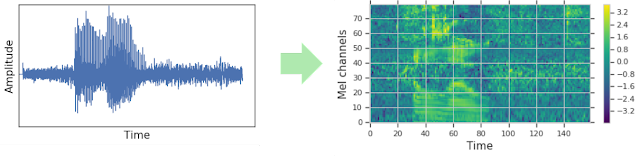








증강이 있거나 없는 LibriSpeech의 테스트 세트에서 네트워크 성능. LibriSpeech 테스트 세트는 test-clean과 test-other의 두 부분으로 나뉘며 후자는 노이
즈가 많은 오디오 데이터를 포함합니다.

훈련, 클린(dev-clean) 및 시끄러운(dev-other) 개발 세트 성능(증강 포함 여부).
최신 결과
우리는 이제 네트워크를 더 크게 만들어 용량을 추가함으로써 훈련 성능을 개선하는 데 집중할 수 있습니다. 교육 시간 증가와 함께 이 작업을 수행함으로써 LibriSpeech 960h 및 Switchboard 300h 작업에 대한 최첨단(SOTA) 결과를 얻을 수 있었습니다 .

LibriSpeech 960h 및 Switchboard 300h 작업에 대한 최신 결과의 단어 오류율(%). 두 작업에 대한 테스트 세트에는 깨끗한(clean/Switchboard) 하위 집합과 잡음이 많은(other/CallHome) 하위 집합이 있습니다. Li 등에서 가져온 이전 SOTA 결과 . al (2019) , Yang et. al (2018) 및 Zeyer et. 알(2018) .
우리가 사용한 간단한 증강 체계는 놀라울 정도로 강력합니다. 종단 간 LAS 네트워크의 성능을 크게 개선하여 LibriSpeech와 같은 소규모 학술 데이터 세트에서 전통적으로 훨씬 더 나은 기존 ASR 모델을 능가할 수 있습니다. 또는 스위치보드.

LibriSpeech 및 Switchboard 작업에서 다양한 네트워크 클래스의 성능. LAS 모델의 성능은 시간 경과에 따라 클래식(예: HMM ) 및 기타 종단 간 모델(예: CTC / ASG )과 비교됩니다.
언어 모델
언어 모델 (LM)은 더 큰 텍스트 전용 데이터 모음에서 학습되며 텍스트에서 학습한 정보를 활용하여 ASR 네트워크의 성능을 개선하는 데 중요한 역할을 했습니다. 그러나 LM은 일반적으로 ASR 네트워크와 별도로 교육을 받아야 하며 메모리가 매우 클 수 있으므로 전화와 같은 소형 장치에 맞추기가 어렵습니다. 우리 연구의 예상치 못한 결과는 SpecAugment로 훈련된 모델이 언어 모델의 도움 없이도 모든 이전 방법을 능가한다는 것입니다. 우리의 네트워크는 여전히 LM을 추가함으로써 이익을 얻지만, 우리의 결과는 LM의 도움 없이 실용적인 목적으로 사용될 수 있는 교육 네트워크의 가능성을 제안한다는 점에서 고무적입니다.

LM이 있거나 없는 LibriSpeech 및 Switchboard 작업의 단어 오류율. SpecAugment는 언어 모델을 포함하기 전에도 이전의 최신 기술을 능가합니다.
과거 ASR에 대한 대부분의 작업은 훈련할 더 나은 네트워크를 찾는 데 집중되었습니다. 우리의 작업은 네트워크를 훈련시키는 더 나은 방법을 찾는 것이 유망한 대안 연구 방향임을 보여줍니다.

파형은 일반적으로 네트워크에 공급되기 전에 시각적 표현(이 경우 로그 멜 스펙트로그램, 이 문서 의 1~3단계)으로 변환됩니다.
SpecAugment는 스펙트로그램을 시간 방향으로 왜곡 하고 , ​​연속 주파수 채널 블록을 마스킹하고, 발화 블록을 시간에 마스킹하여 스펙트로그램을 수정합니다. 이러한 증가는 네트워크가 시간 방향의 변형, 주파수 정보의 부분적 손실 및 입력 음성의 작은 세그먼트의 부분적 손실에 대해 견고하도록 선택되었습니다. 이러한 확대 정책의 예가 아래에 표시됩니다.

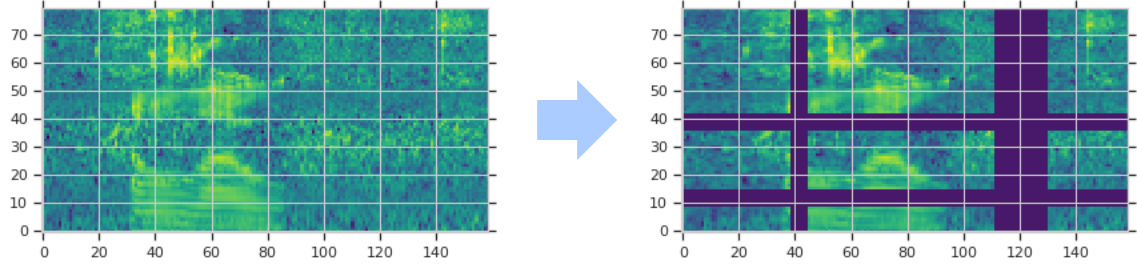


log mel 스펙트로그램은 시간 방향으로 워핑하고 연속 시간 단계(수직 마스크) 및 멜 주파수 채널(수평 마스크)의 마스킹(다중) 블록을 통해 보강됩니다. 스펙트로그램의 가려진 부분은 강조를 위해 보라색으로 표시됩니다.
SpecAugment를 테스트하기 위해 우리는 LibriSpeech 데이터 세트로 몇 가지 실험을 수행했습니다. 여기에서 음성 인식에 일반적으로 사용되는 종단 간 네트워크인 3개의 LAS(Listen Attend and Spell) 네트워크를 선택하고 증강 기능을 사용하거나 사용하지 않고 훈련된 네트워크 간의 테스트 성능을 비교했습니다. . ASR 네트워크의 성능은 대상 성적표에 대해 네트워크에서 생성된 성적표의 WER( Word Error Rate )로 측정됩니다. 여기서는 모든 하이퍼파라미터를 동일하게 유지하고 네트워크에 입력된 데이터만 변경했습니다. 우리는 SpecAugment가 네트워크 또는 훈련 매개변수를 추가로 조정하지 않고도 네트워크 성능을 향상시킨다는 것을 발견했습니다.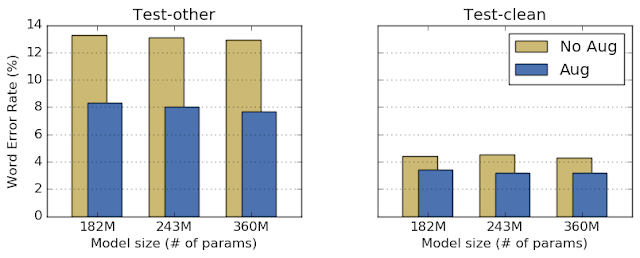

더 중요한 것은 SpecAugment가 의도적으로 손상된 데이터를 제공하여 네트워크가 과적합되는 것을 방지합니다. 이에 대한 예로서 아래에서 교육 세트 및 개발(또는 개발) 세트에 대한 WER이 증강이 있거나 없는 교육을 통해 어떻게 진화하는지 보여줍니다. 증강 없이 네트워크는 훈련 세트에서 거의 완벽한 성능을 달성하는 반면 깨끗한 개발 세트와 잡음이 많은 개발 세트 모두에서 성능이 크게 떨어집니다. 반면에 증강을 사용하면 네트워크가 훈련 세트에서도 잘 작동하지만 실제로는 깨끗한 개발 세트에서 더 나은 성능을 보여주고 잡음이 많은 개발 세트에서 비슷한 성능을 보여줍니다. 이는 네트워크가 더 이상 교육 데이터에 과적합되지 않으며 교육 성능을 개선하면 테스트 성능이 향상된다는 것을 의미합니다.
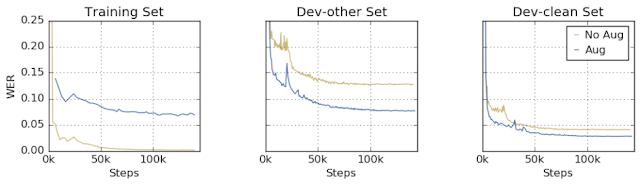


## 최신 결과
우리는 이제 네트워크를 더 크게 만들어 용량을 추가함으로써 훈련 성능을 개선하는 데 집중할 수 있습니다. 교육 시간 증가와 함께 이 작업을 수행함으로써 LibriSpeech 960h 및 Switchboard 300h 작업에 대한 최첨단(SOTA) 결과를 얻을 수 있었습니다 .


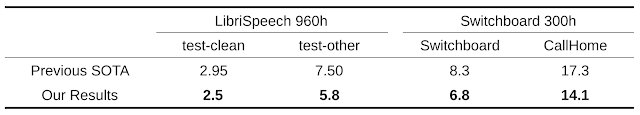


우리가 사용한 간단한 증강 체계는 놀라울 정도로 강력합니다. 종단 간 LAS 네트워크의 성능을 크게 개선하여 LibriSpeech와 같은 소규모 학술 데이터 세트에서 전통적으로 훨씬 더 나은 기존 ASR 모델을 능가할 수 있습니다. 또는 스위치보드.

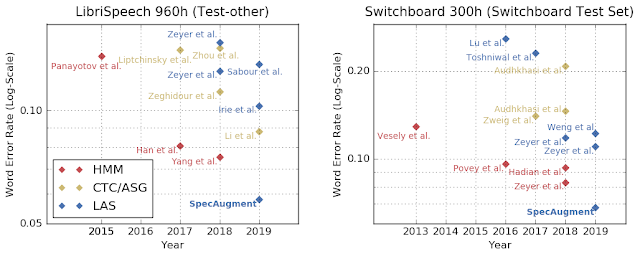

언어 모델
언어 모델 (LM)은 더 큰 텍스트 전용 데이터 모음에서 학습되며 텍스트에서 학습한 정보를 활용하여 ASR 네트워크의 성능을 개선하는 데 중요한 역할을 했습니다. 그러나 LM은 일반적으로 ASR 네트워크와 별도로 교육을 받아야 하며 메모리가 매우 클 수 있으므로 전화와 같은 소형 장치에 맞추기가 어렵습니다. 우리 연구의 예상치 못한 결과는 SpecAugment로 훈련된 모델이 언어 모델의 도움 없이도 모든 이전 방법을 능가한다는 것입니다. 우리의 네트워크는 여전히 LM을 추가함으로써 이익을 얻지만, 우리의 결과는 LM의 도움 없이 실용적인 목적으로 사용될 수 있는 교육 네트워크의 가능성을 제안한다는 점에서 고무적입니다.
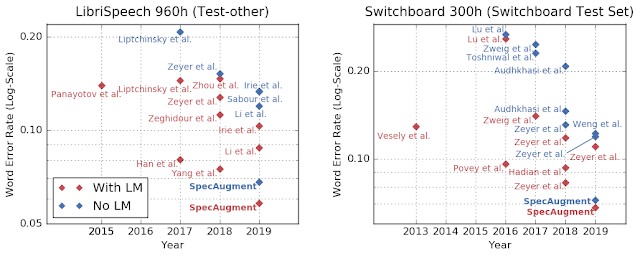

LM이 있거나 없는 LibriSpeech 및 Switchboard 작업의 단어 오류율. SpecAugment는 언어 모델을 포함하기 전에도 이전의 최신 기술을 능가합니다.
과거 ASR에 대한 대부분의 작업은 훈련할 더 나은 네트워크를 찾는 데 집중되었습니다. 우리의 작업은 네트워크를 훈련시키는 더 나은 방법을 찾는 것이 유망한 대안 연구 방향임을 보여줍니다.